In [ ]:
!git clone https://github.com/frqc/NoDatasetNeeded.git
%cd /content/NoDatasetNeeded/
!git checkout  yilin
%cd PSMNet\ Extension

Cloning into 'NoDatasetNeeded'...
remote: Enumerating objects: 181, done.
remote: Counting objects: 100% (181/181), done.
remote: Compressing objects: 100% (120/120), done.
remote: Total 181 (delta 61), reused 175 (delta 55), pack-reused 0
Receiving objects: 100% (181/181), 39.27 MiB | 30.16 MiB/s, done.
Resolving deltas: 100% (61/61), done.
/content/NoDatasetNeeded
Branch 'yilin' set up to track remote branch 'yilin' from 'origin'.
Switched to a new branch 'yilin'
/content/NoDatasetNeeded/PSMNet Extension


In [ ]:
!wget https://s3.eu-central-1.amazonaws.com/avg-kitti/data_scene_flow.zip
!unzip -q data_scene_flow.zip

--2021-05-06 18:18:46--  https://s3.eu-central-1.amazonaws.com/avg-kitti/data_scene_flow.zip
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 52.219.75.179
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|52.219.75.179|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1681488619 (1.6G) [application/zip]
Saving to: ‘data_scene_flow.zip’

data_scene_flow.zip 100%[===================>]   1.57G  20.6MB/s    in 79s     

2021-05-06 18:20:05 (20.4 MB/s) - ‘data_scene_flow.zip’ saved [1681488619/1681488619]



In [ ]:
!pip install reindent
!reindent finetune.py

In [ ]:
#freeze first_two_conv_in_hourglass
!python finetune.py --maxdisp 192 \
                   --model stackhourglass \
                   --datatype 2015 \
                   --datapath training/ \
                   --epochs 300 \
                   --loadmodel pretrained_sceneflow.tar \
                   --savemodel freeze_first_two_conv_in_hourglass

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Sequential(
  (0): Conv3d(64, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1

In [ ]:
!python finetune.py --maxdisp 192 \
                   --model stackhourglass \
                   --datatype 2015 \
                   --datapath training/ \
                   --epochs 300 \
                   --loadmodel pretrained_sceneflow.tar \

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Sequential(
  (0): AvgPool2d(kernel_size=(64, 64), stride=(64, 64), padding=0)
  (1): Se

In [ ]:
!python finetune.py --maxdisp 192 \
                   --model stackhourglass \
                   --datatype 2015 \
                   --datapath training/ \
                   --epochs 20 \
                   --loadmodel pretrained_sceneflow.tar \
                   --savemodel freeze_top_3

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Sequential(
  (0): AvgPool2d(kernel_size=(64, 64), stride=(64, 64), padding=0)
  (1): Se

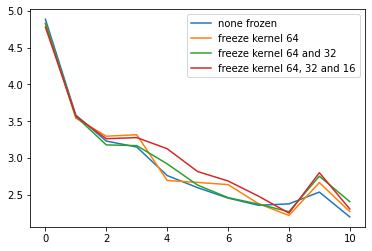

In [ ]:
import matplotlib.pyplot as plt
  
# create data
y_non_frozen = [4.885, 3.583, 3.231, 3.150, 2.763, 2.598, 2.457, 2.359, 2.378, 2.538, 2.201]
y_top1_frozen = [4.832, 3.541, 3.297, 3.317, 2.696, 2.669, 2.640, 2.381, 2.221, 2.667, 2.273]
y_top2_frozen = [4.825, 3.566, 3.179, 3.169, 2.922, 2.633, 2.463, 2.375, 2.272, 2.754, 2.408]
y_top3_frozen = [4.778, 3.568, 3.263, 3.278, 3.127, 2.817, 2.689, 2.483, 2.253, 2.801, 2.309]

plt.plot(range(11), y_non_frozen, label = 'none frozen')
plt.plot(range(11), y_top1_frozen , label = 'freeze kernel 64')
plt.plot(range(11), y_top2_frozen , label = 'freeze kernel 64 and 32')
plt.plot(range(11), y_top3_frozen , label = 'freeze kernel 64, 32 and 16')
plt.legend()
plt.show()

In [ ]:
!python finetune.py --maxdisp 192 \
                   --model stackhourglass \
                   --datatype 2015 \
                   --datapath training/ \
                   --epochs 20 \
                   --loadmodel pretrained_sceneflow.tar \
                   --savemodel freeze_top_2

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Sequential(
  (0): AvgPool2d(kernel_size=(64, 64), stride=(64, 64), padding=0)
  (1): Se

In [ ]:
!python finetune.py --maxdisp 192 \
                   --model stackhourglass \
                   --datatype 2015 \
                   --datapath training/ \
                   --epochs 20 \
                   --loadmodel pretrained_sceneflow.tar \
                   --savemodel freeze_top_1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Sequential(
  (0): AvgPool2d(kernel_size=(64, 64), stride=(64, 64), padding=0)
  (1): Se

In [ ]:
import  torch
from models import *
import torch.nn as nn
model = stackhourglass(192)
model = nn.DataParallel(model)
model.cuda()
state_dict = torch.load('pretrained_sceneflow.tar')
model.load_state_dict(state_dict['state_dict'])
for i, child in enumerate(model.children()):
  if i == 0:
      for j, childchild in enumerate(child.children()):
        if j == 1 or j == 2:
            for param in childchild.parameters():
              param.requires_grad = False
            print(childchild)

Sequential(
  (0): Sequential(
    (0): Conv3d(64, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
    (1): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): ReLU(inplace=True)
  (2): Sequential(
    (0): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
    (1): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (3): ReLU(inplace=True)
)
Sequential(
  (0): Sequential(
    (0): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
    (1): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): ReLU(inplace=True)
  (2): Sequential(
    (0): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
    (1): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)


In [ ]:
!python submission.py --maxdisp 192 \
                   --model stackhourglass \
                   --KITTI 2015\
                   --datapath ./training/ \
                   --loadmodel finetune_9.tar \
        

Number of model parameters: 5224768
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3328: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=trilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format

In [ ]:
!python finetune.py --maxdisp 192 \
                   --model stackhourglass \
                   --datatype 2015 \
                   --datapath training/ \
                   --epochs 20 \
                   --loadmodel pretrained_sceneflow.tar \